In [88]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

import seaborn as sns
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 12

import matplotlib.pyplot as plt
import matplotlib.ticker as tck

import pandas as pd
import math

# import mdn

# from tensorflow.keras.models import load_model


import joblib

import shap
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

import numpy as np
np.random.seed(123)





import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)

2.3.0


In [2]:
df_all = pd.read_csv("Rocky_compostion.txt", sep='\t')

In [3]:
df_all.describe()

,Mass,Radius,H2O_mass_frac,Core_mass_frac,H2O_radial_frac,Mantle_radial_frac,Core_radial_frac,P_CMB,T_CMB,k_2,Fe/Mg mantle,Fe/Mg bulk,Si/Mg bulk,Mg/Si bulk,Fe/Mg bulk_new,Fe/(Mg+Si)
count,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06,3.885000e+06
mean,4.597388e+00,1.421694e+00,4.707310e-02,3.387669e-01,6.416641e-02,4.267633e-01,5.090703e-01,6.809138e+02,3.254010e+03,7.768614e-01,6.666669e-01,2.287695e+00,7.777944e-01,1.500000e+00,2.484056e+00,1.417341e+00
std,2.740623e+00,3.053241e-01,2.855055e-02,1.992691e-01,3.397428e-02,1.567926e-01,1.502300e-01,4.751716e+02,7.090200e+02,1.189026e-01,3.364059e-01,1.586860e+00,3.340956e-01,5.338538e-01,1.839381e+00,1.036599e+00
min,1.000060e-01,4.486940e-01,3.579140e-05,1.904930e-07,1.230960e-04,1.186770e-01,4.458040e-03,9.850930e+00,1.678350e+03,5.539280e-01,1.111110e-01,1.111170e-01,4.166670e-01,5.999988e-01,1.111175e-01,4.208208e-02
25%,2.190030e+00,1.231480e+00,2.191410e-02,1.669658e-01,3.577068e-02,3.007272e-01,4.055860e-01,2.854760e+02,2.730190e+03,6.850460e-01,3.888890e-01,1.114590e+00,5.128210e-01,1.050000e+00,1.146352e+00,6.535848e-01
50%,4.492430e+00,1.482120e+00,4.600870e-02,3.335260e-01,6.554780e-02,4.098719e-01,5.266360e-01,5.900005e+02,3.240700e+03,7.585980e-01,6.666670e-01,1.838490e+00,6.666670e-01,1.499999e+00,1.927489e+00,1.110265e+00
75%,6.871830e+00,1.656390e+00,7.101100e-02,5.072680e-01,9.163110e-02,5.353070e-01,6.306193e-01,1.002250e+03,3.744570e+03,8.521603e-01,9.444440e-01,3.099480e+00,9.523810e-01,1.949998e+00,3.352198e+00,1.922622e+00
max,1.000000e+01,2.050850e+00,1.000000e-01,7.000000e-01,1.470660e-01,9.800098e-01,8.113090e-01,1.999990e+03,5.734810e+03,1.375010e+00,1.222220e+00,1.038090e+01,1.666670e+00,2.399998e+00,1.479124e+01,7.353723e+00


# DNN training

In [57]:
input_parameters = [
    'Mass', 
    'Radius',
    'Fe/Mg bulk_new',
    'Mg/Si bulk',
#     'H2O_radial_frac',
#     'Mantle_radial_frac',
#     'Core_radial_frac',
#     'Core_mass_frac',
#     'P_CMB', 
#     'T_CMB',
]

output_parameters = [
    'k_2',
]

X = df_all[input_parameters]
y = df_all.loc[:, output_parameters]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=256)

scaler_x = MinMaxScaler().fit(X_train)
scaler_y = MinMaxScaler().fit(y_train)

# from pickle import dump
# save the scaler
# dump(scaler, open('scaler.pkl', 'wb'))
X_train_scaled = scaler_x.transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

joblib.dump(scaler_x, "DNN_pred_k2_Xscaler_20220924.save") 
joblib.dump(scaler_y, "DNN_pred_k2_yscaler_20220924.save")

# a, X_test_scaled_pre, b, y_test_scaled_pre = train_test_split(X_test_scaled, y_test_scaled, test_size=0.05)

['DNN_pred_k2_yscaler_20220924.save']

In [29]:
def build_model():
  model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=[len(input_parameters)]),
                            layers.Dropout(0.05),
                            layers.Dense(128, activation='relu'),
                            layers.Dropout(0.05),
                            layers.Dense(1,activation='relu')
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [32]:
model = build_model()
model.summary()


batchsize = 256
early_stopping = EarlyStopping(monitor='val_loss',
                mode='min',
                patience=30, 
                verbose=1,
                )

history = model.fit(
  X_train_scaled, y_train_scaled, batch_size=batchsize,
  epochs=200, validation_split = 0.1, verbose=1,
  callbacks=[early_stopping])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               640       
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 17,281
Trainable params: 17,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10927/10927 [==============================] - 21s 2ms/step - loss: 0.0065 - mae: 0.0619 - mse: 0.0065 

10927/10927 [==============================] - 22s 2ms/step - loss: 0.0053 - mae: 0.0558 - mse: 0.0053 - val_loss: 0.0053 - val_mae: 0.0551 - val_mse: 0.0053
Epoch 44/200
10927/10927 [==============================] - 21s 2ms/step - loss: 0.0053 - mae: 0.0558 - mse: 0.0053 - val_loss: 0.0053 - val_mae: 0.0552 - val_mse: 0.0053
Epoch 45/200
10927/10927 [==============================] - 22s 2ms/step - loss: 0.0053 - mae: 0.0558 - mse: 0.0053 - val_loss: 0.0053 - val_mae: 0.0552 - val_mse: 0.0053
Epoch 46/200
10927/10927 [==============================] - 21s 2ms/step - loss: 0.0053 - mae: 0.0558 - mse: 0.0053 - val_loss: 0.0052 - val_mae: 0.0550 - val_mse: 0.0052
Epoch 47/200
10927/10927 [==============================] - 21s 2ms/step - loss: 0.0053 - mae: 0.0557 - mse: 0.0053 - val_loss: 0.0053 - val_mae: 0.0553 - val_mse: 0.0053
Epoch 48/200
10927/10927 [==============================] - 22s 2ms/step - loss: 0.0053 - mae: 0.0557 - mse: 0.0053 - val_loss: 0.0053 - val_mae: 0.0553 - val

In [33]:
model.save("DNN_pred_k2_20220924.h5")

In [34]:
df_loss = pd.DataFrame(data=history.history)

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.


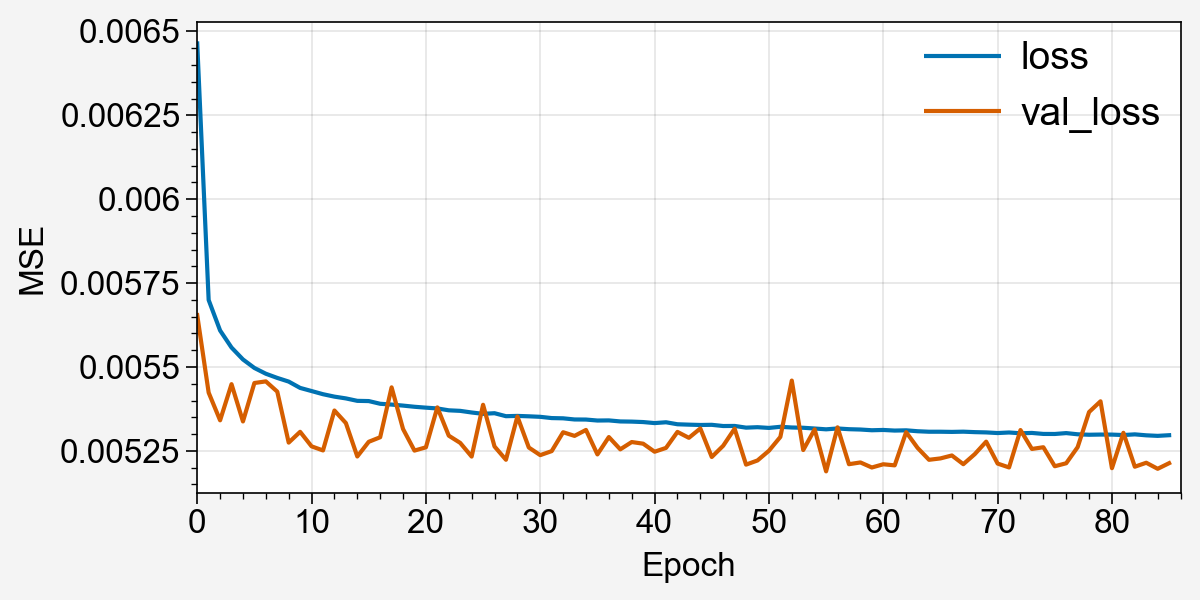

In [56]:
import proplot as pplt
df_loss = pd.DataFrame(data=history.history)
# df_loss.columns=['Training', 'Validation']
df_loss.to_excel("loss_DNN_pred_k2_20220925.xls")
fig = pplt.figure(figsize=(6,3))
ax = fig.subplot(xlabel='Epoch', ylabel='MSE')
ax.plot(df_loss[["loss", "val_loss"]], legend='ur', legend_kw={'frame':False, 'fontsize':12, 'ncol':1})
ax.format(xlim=(0,len(df_loss.index)), labelsize=12, ticklabelsize=12)
fig.save('loss_DNN_pred_k2.pdf')

## performance in testing dataset

In [36]:
pred = model.predict(X_test_scaled)

In [37]:
pred_t = scaler_y.inverse_transform(pred)

In [38]:
pred_t

array([[0.7244237 ],
       [0.6260651 ],
       [0.68899274],
       ...,
       [0.6834609 ],
       [0.8590986 ],
       [0.84363294]], dtype=float32)

Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.
Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.


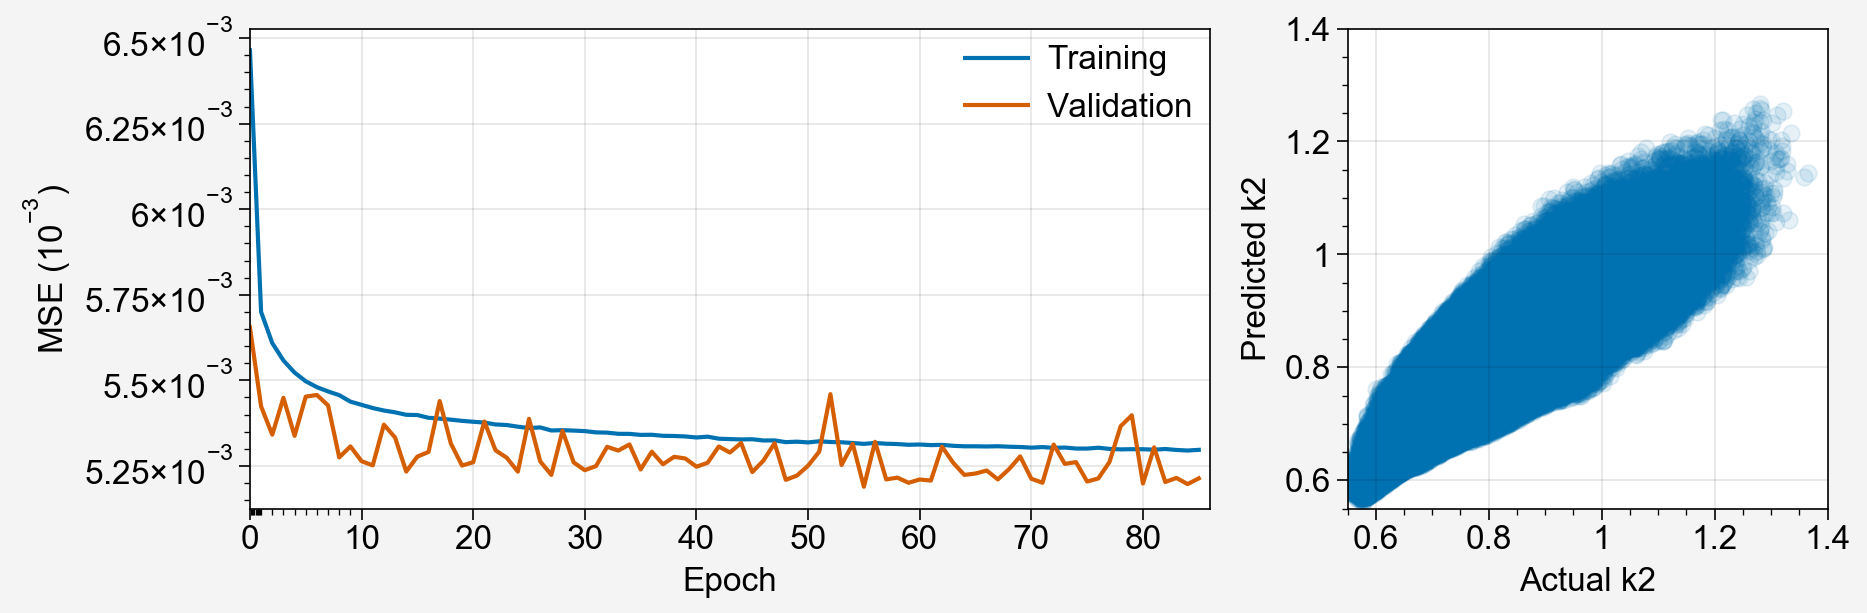

In [101]:
gs = pplt.GridSpec(nrows=1, ncols=2, wratios=(2,1))
fig = pplt.figure(refaspect=2, refwidth=4.8, share=False)


ax = fig.subplot(gs[0])
ax.plot(df_loss[["loss", "val_loss"]], legend='ur', legend_kw={'frame':False, 'fontsize':5, 'ncol':1, 
                            'labels':['Training', 'Validation']})
ax.format(
    ylabel="MSE ($10^{-3}$)",
    xlabel='Epoch',
    
    xlim=(0,len(df_loss.index)),
    yformatter='sci',
    labelsize=12, ticklabelsize=12)



ax = fig.subplot(gs[1])
ax.scatter(y_test, pred_t, alpha=0.1)
# ax.plot([0.55,1.5],[.55,1.5],linestyle='--')
ax.format(
    
    xlabel='Actual k2',
    ylabel='Predicted k2',
    xlocator=0.2,
    ylocator=0.2,
    xlim=(0.55,1.4),
    ylim=(0.55,1.4)
)
fig.format(
#     abc='(a)',
    abcloc='ul',
)
# fig.save('DNN_loss and pred1.pdf', )

Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.
Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.


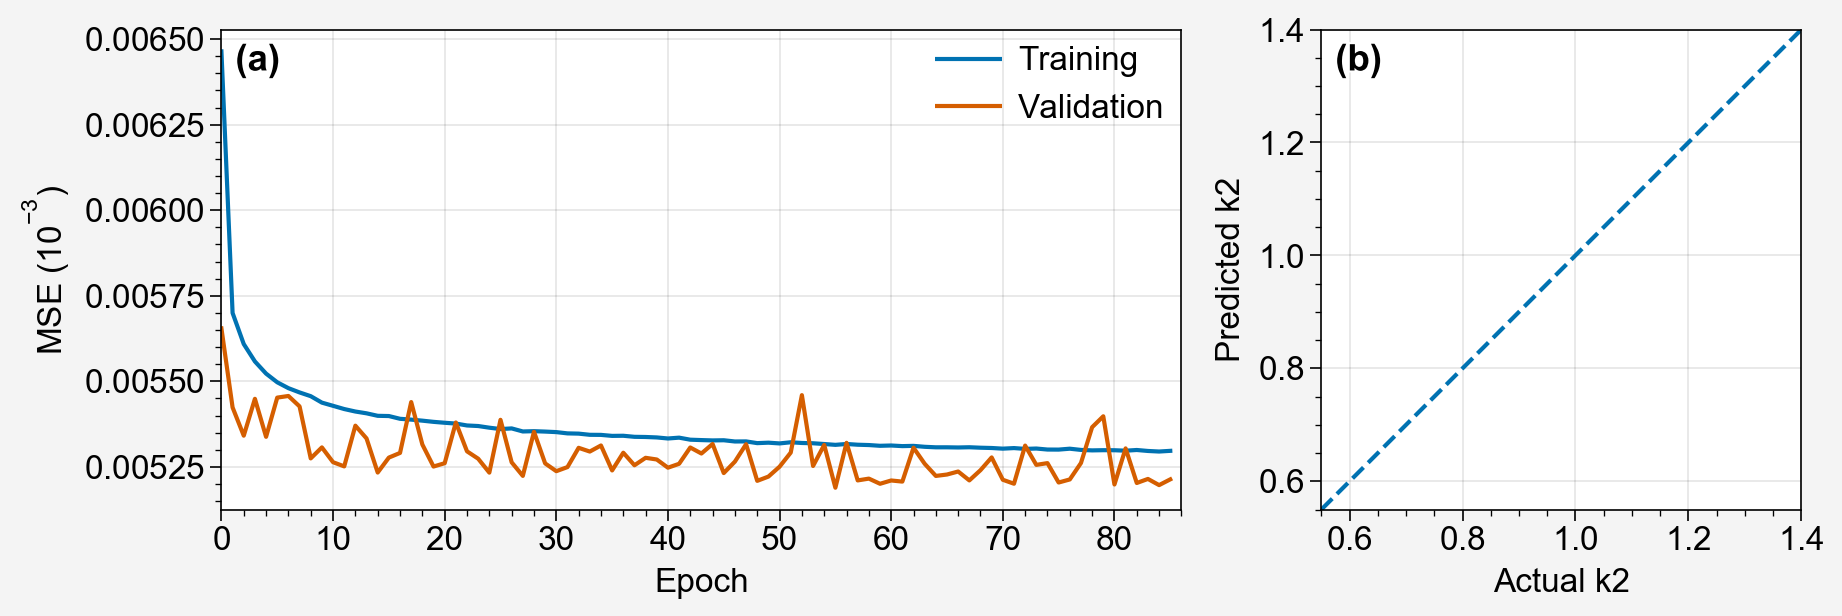

In [109]:
gs = pplt.GridSpec(nrows=1, ncols=2, wratios=(2,1))
fig = pplt.figure(refaspect=2, refwidth=4.8, share=False)


ax = fig.subplot(gs[0])
ax.plot(df_loss[["loss", "val_loss"]], legend='ur', legend_kw={'frame':False, 'fontsize':5, 'ncol':1, 
                            'labels':['Training', 'Validation']})

formatter = tck.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-3,2))
ax.format(
    ylabel="MSE ($10^{-3}$)",
    xlabel='Epoch',
    xlim=(0,len(df_loss.index)),
    yformatter=formatter,
    labelsize=12, ticklabelsize=12
)



ax = fig.subplot(gs[1])
# ax.scatter(y_test, pred_t, alpha=0.1)
ax.plot([0.55,1.5],[.55,1.5],linestyle='--')
ax.format(
    xlabel='Actual k2',
    ylabel='Predicted k2',
    xlocator=0.2,
    ylocator=0.2,
    xformatter=formatter,
    yformatter=formatter,
    xlim=(0.55,1.4),
    ylim=(0.55,1.4)
)
fig.format(
    abc='(a)',
    abcloc='ul',
)
fig.save('DNN_loss and pred.pdf')

Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
Conversion of the second argument of issubdtype from `object` to `np.generic` is deprecated. In future, it will be treated as `np.object_ == np.dtype(object).type`.


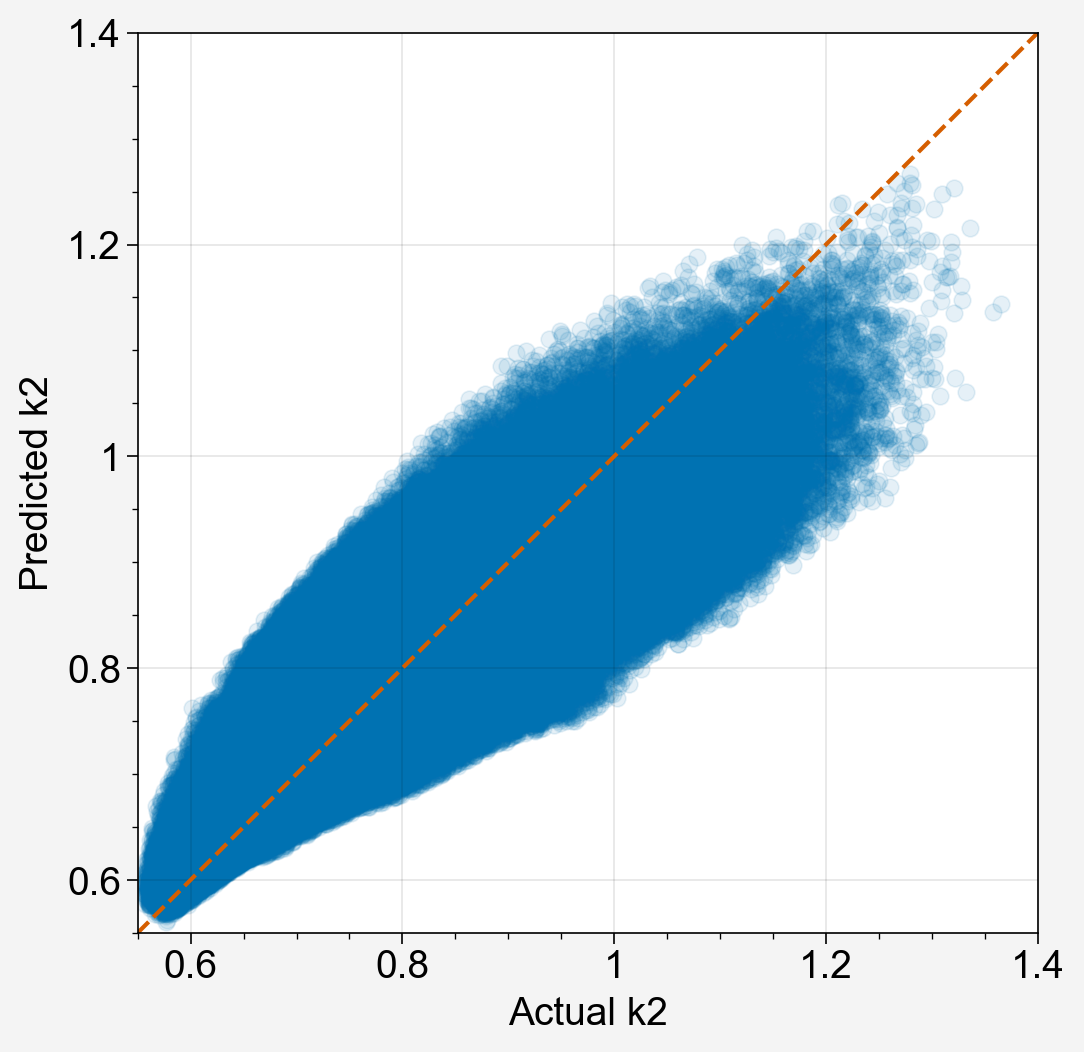

In [53]:
fig, ax = pplt.subplots(refwidth=4.5)
ax.scatter(y_test, pred_t, alpha=0.1)
ax.plot([0.55,1.5],[.55,1.5],linestyle='--')
ax.format(
    xlabel='Actual k2',
    ylabel='Predicted k2',
    xlocator=0.2,
    ylocator=0.2,
    xlim=(0.55,1.4),
    ylim=(0.55,1.4))
fig.save('DNN_pred.png',dpi=300)

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(np.ravel(y_test.values), np.ravel(pred_t))
print('R2 = %.2f' % r2)

R2 = 0.75


In [54]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.ravel(y_test.values), np.ravel(pred_t))

0.04493333224827162

# Trained DNN predicts k2

In [60]:
# Kepler-78b m=1.77, r=1.228, Fe/Mg=1.325, Si/Mg=0.933, Fe/(Mg+Si)=1.325/(1+0.933)=0.685
# HD3167b m=5.69, r=1.574, Fe/Mg=1.065, Si/Mg=0.692, Fe/(Mg+Si)=1.065/(1+0.692)=0.629

input_parameters = [
    'Mass', 
    'Radius',
    'Fe/Mg bulk_new',
    'Mg/Si bulk',
#     'H2O_radial_frac',
#     'Mantle_radial_frac',
#     'Core_radial_frac',
#     'Core_mass_frac',
#     'P_CMB', 
#     'T_CMB',
]

output_parameters = [
    'k_2',
]

dnn_model = load_model("DNN_MRFe(Mg+Si)_pred_k2_20220924-256.h5")
input_scaler = joblib.load("DNN_pred_k2_Xscaler_20220924.save")
output_scaler = joblib.load("DNN_pred_k2_yscaler_20220924.save")

## Kepler-78b

In [62]:
input_array = np.array([
    [1.77],  # mass
    [1.228],  # radius
    [1.325],  # bulk Fe/Mg
    [1/0.933],  # bulk Mg/Si
])
scaled_input = input_scaler.transform(input_array.T)
k2_pred = dnn_model.predict(scaled_input)
real_k2 = output_scaler.inverse_transform(k2_pred)
print('Kepler-78b k2： %s' % real_k2[0][0])

Kepler-78b k2： 0.81889075


## HD3167b

In [63]:
input_array = np.array([
    [5.69],  # mass
    [1.574],  # radius
    [1.065],  # bulk Fe/Mg
    [1/0.692],  # bulk Mg/Si
])
scaled_input = input_scaler.transform(input_array.T)
k2_pred = dnn_model.predict(scaled_input)
real_k2 = output_scaler.inverse_transform(k2_pred)
print('HD3167b k2： %s' % real_k2[0][0])

HD3167b k2： 0.85389626
